In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from  sklearn.model_selection import train_test_split
from sklearn.linear_model import  LinearRegression
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('placement.csv')
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


In [3]:
# formula to calculate 1 feature data y = mx + b
# m = € (xi - x̄)(yi - ȳ) / € ( xi - x̄)^2
# Class to calcualate a linear regression
class LinearR:
    def __init__(self , x , y ):
        self.x = x 
        self.y = y 
    def cal_best_fit_line(self):
        x_mean = np.mean(self.x)
        y_mean  = np.mean(self.y)
        
        m  = np.sum((self.x - x_mean) * (self.y - y_mean)) / np.sum((self.x - x_mean)**2)
        b = y_mean - m*x_mean
        
        self.y_pred = m* self.x  + b # y =  mx + b
        print(self.y_pred)
        print(f"This one slope : {m}  and THis one intercept data : {b} ")
        
    def plot_best_fit_line(self):
        plt.scatter(self.x, self.y)
        plt.plot(self.x,self.y_pred , color='red')
        plt.show()

In [4]:
Lr = LinearR(df['cgpa'], df['package'])

In [5]:
Lr.cal_best_fit_line()

0      2.938806
1      1.930629
2      3.468526
3      3.240689
4      2.967286
         ...   
195    2.961590
196    2.369215
197    3.121075
198    3.360304
199    2.557180
Name: cgpa, Length: 200, dtype: float64
This one slope : 0.5695912947937536  and THis one intercept data : -0.9856779462557346 


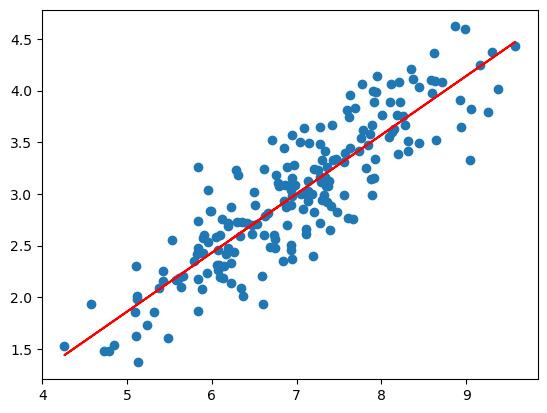

In [6]:
Lr.plot_best_fit_line()

In [7]:
x = df['cgpa']
y = df['package']
y

0      3.26
1      1.98
2      3.25
3      3.67
4      3.57
       ... 
195    2.46
196    2.57
197    3.24
198    3.96
199    2.33
Name: package, Length: 200, dtype: float64

In [8]:
x_train , x_test , y_train ,y_test = train_test_split(x ,y , test_size=0.2 , random_state=2)

In [9]:
class LinearRegression1:
    def __init__(self):
        self.m = None
        self.b = None
    def fit(self, x_train , y_train):
        num = 0
        dum = 0
       
        x_mean  = x_train.mean()
        y_mean  = y_train.mean()

        for i in range(x_train.shape[0]):
            # print(f"{i} ",num, dum)
            num += np.sum((x_train - x_mean)*(y_train - y_mean)) 
            dum += np.sum((x_train - x_mean)**2)
        self.m  = num / dum 
        self.b = ((y_train.mean()) - (self.m * x_train.mean()))
        # print(x_train,y_train)
    def predect(self , x_test):
        return self.m * x_test + self.b

In [10]:
y_train

137    3.13
163    3.91
111    2.25
123    2.30
109    4.06
       ... 
43     2.76
22     2.30
72     3.62
15     3.23
168    3.52
Name: package, Length: 160, dtype: float64

In [11]:
m = LinearRegression1()

In [12]:
y_train.shape[0]

160

In [13]:
m.fit(x_train,y_train)

In [14]:
x_test

112    8.58
29     7.15
182    5.88
199    6.22
193    4.57
85     4.79
10     5.32
54     6.86
115    8.35
35     6.87
12     8.94
92     7.90
13     6.93
126    5.91
174    7.32
2      7.82
44     5.09
3      7.42
113    6.94
14     7.73
23     6.19
25     7.28
6      6.73
134    7.20
165    8.21
173    6.75
45     7.87
65     7.60
48     8.63
122    5.12
178    8.15
64     7.36
9      8.31
57     6.60
78     6.59
71     7.47
128    7.93
176    6.29
131    6.37
53     6.47
Name: cgpa, dtype: float64

In [15]:
y_pred = m.predect(x_test)


In [26]:
r2_score(y_test,y_pred)

0.7807301475103847

#### Here  I create A R2_score from scratch to calulate data

In [31]:
# y = mx  + b 
# m = E (x- x bar ) * (y - y bar) / E (x- x bar )^2  m = cov(x, y) / var(x) 
# b = y bar  - m x bar 
# 1 - SSE / SSt
# 1 - E( y - y hat) / E ( y - y bar)
# SSE = E (y - y hat )^2 
# SST = E (y - y bar )^2
# how to calculate r2_score  from scartch 
m = np.sum((x_train   - x_train.mean()) * (y_train - y_train.mean())) / np.sum((x_train - x_train.mean())**2)
b = y_train.mean() - m*x_train.mean() 
# y = m * x_test + b  now the main question st here why we give test data why not we give train data becouse we are predecting the data use 
# test data not on train data
y = m*x_test + b 

r2  = 1  - np.sum((y_test - y)**2) / np.sum((y_test - y_test.mean())**2)


In [32]:
r2

np.float64(0.780730147510384)